In [1]:
import sys
import os

# Get the current working directory (where the notebook is running)
SCRIPT_DIR = os.getcwd()  # or use os.path.dirname(os.path.abspath('')) for similar effect
sys.path.append(os.path.dirname(SCRIPT_DIR))


# Basic
import numpy as np
import numpy as np
def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)
import matplotlib.pyplot as plt

# Dataset
from keras.datasets import fashion_mnist

# Evaluation
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Your SOM model
from som import SOM


2025-04-28 15:50:39.668572: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745869839.681726 3365396 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745869839.685633 3365396 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745869839.698368 3365396 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745869839.698384 3365396 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745869839.698386 3365396 computation_placer.cc:177] computation placer alr

In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Flatten images from (28,28) to (784,)
X_train = X_train.reshape(-1, 28*28).astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 28*28).astype(np.float32) / 255.0

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 784)
Test shape: (10000, 784)


In [3]:
# Downsizing

X_train = X_train[:10000]
X_test = X_test[:1000]

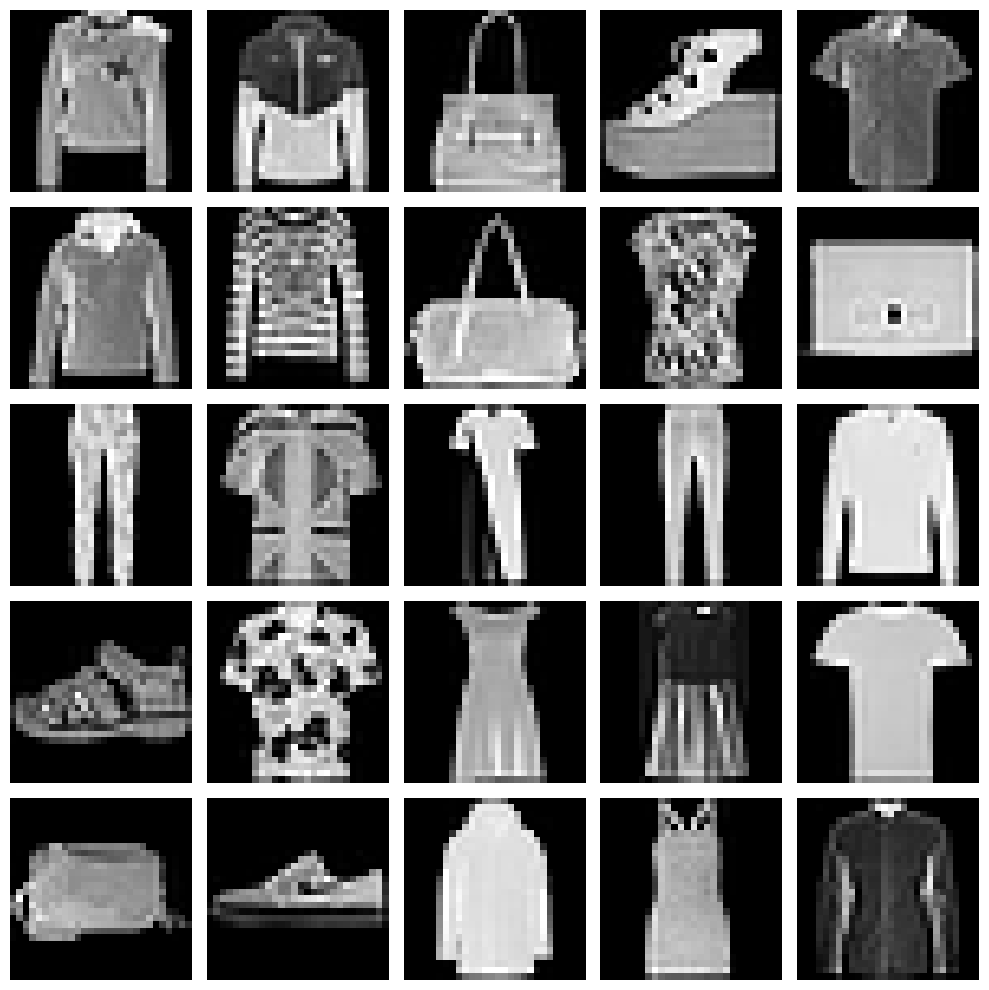

In [4]:
import matplotlib.pyplot as plt
import numpy as np

num_samples = 25  # you can change this
grid_size = int(num_samples ** 0.5)

# randomly select 25 samples from X_train
indices = np.random.choice(len(X_train), size=num_samples, replace=False)
selected_samples = X_train[indices]

fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
axes = axes.flatten()

for ax, neuron_weights in zip(axes, selected_samples.reshape(-1, 784)):
    img = neuron_weights.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [5]:
# Initialize SOM
som = SOM(
    lattice_rows=5,
    lattice_columns=5,
    initial_learning_rate=1,
    neighbourhood_radius=3,
    max_iters=10000,
    learning_rate_type="exponential",
    random_state=42,
    verbose=True,
)

# Fit SOM
som.fit(X_train)


KeyboardInterrupt: 

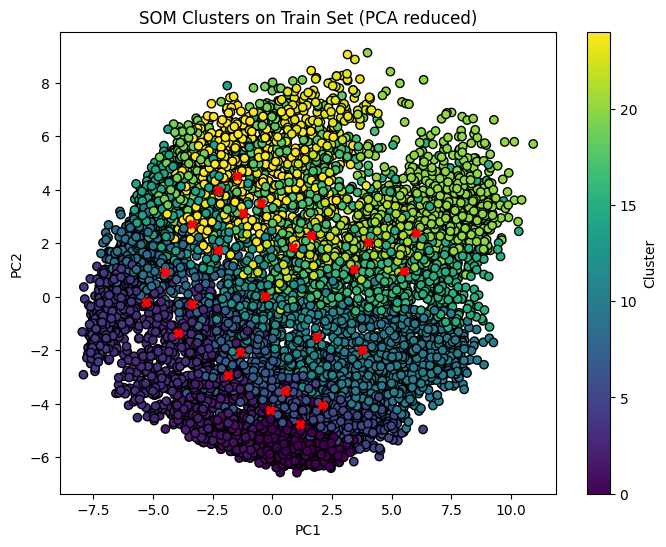

In [ ]:
from sklearn.decomposition import PCA

# Visualize test predictions
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
grid_coords_2d = pca.transform(som.weights_.reshape(-1, 784))

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=som.labels_, cmap='viridis', edgecolor='k')
plt.scatter(grid_coords_2d[:, 0], grid_coords_2d[:, 1], c='red', marker='X')
plt.title("SOM Clusters on Train Set (PCA reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label='Cluster')
plt.show()

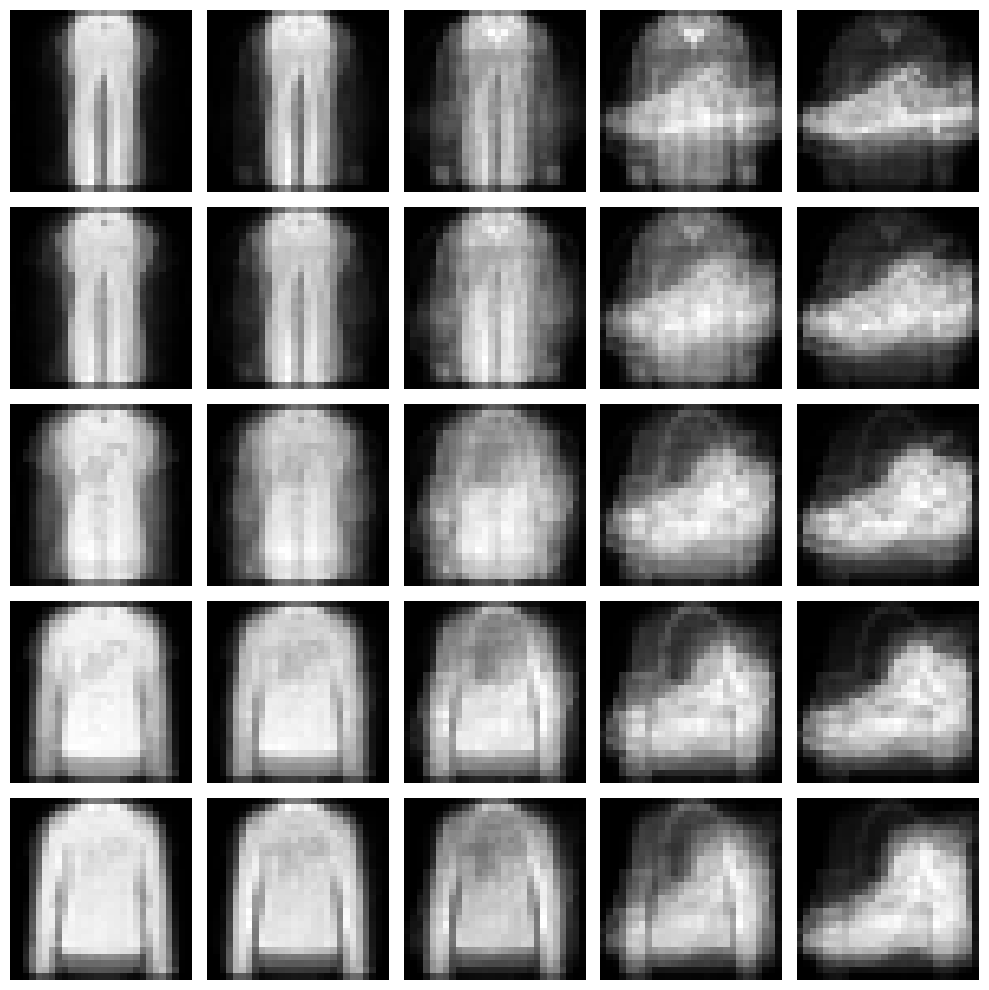

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.flatten()

for ax, neuron_weights in zip(axes, som.weights_.reshape(-1, 784)):
    img = neuron_weights.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()